<a href="https://colab.research.google.com/github/Mohammedaslaan/DataScience-AIML-Practicals/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [ ]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [ ]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [ ]:

# Calculate label counts and create the bar plot
label_counts = train['label'].value_counts()
ax = label_counts.plot.bar(color='pink', figsize=(6, 4))
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Label Counts')

# Save the plot as a PNG file
plot_file = 'label_counts.png'
plt.savefig(plot_file)

# Display a message indicating the file was saved
print(f"The plot has been saved as {plot_file}.")

# Close the plot
plt.close()

The plot has been saved as label_counts.png.


<Axes: >

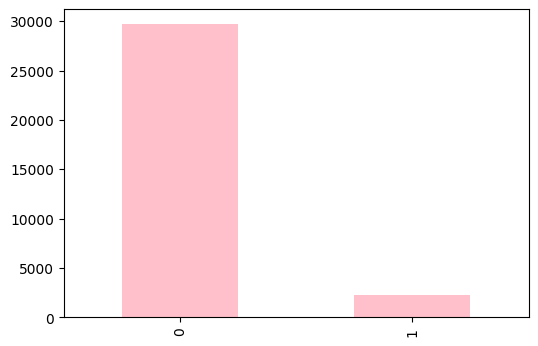

In [ ]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the length of tweets in the train dataset and create the histogram
length_train = train['tweet'].str.len()
ax_train = length_train.plot.hist(color='pink', figsize=(6, 4))
ax_train.set_xlabel('Length')
ax_train.set_ylabel('Frequency')
ax_train.set_title('Length of Tweets (Train)')

# Save the train histogram as a PNG file
plot_file_train = 'length_train_hist.png'
plt.savefig(plot_file_train)

# Display a message indicating the file was saved
print(f"The train histogram has been saved as {plot_file_train}.")

# Close the train histogram plot
plt.close()

# Calculate the length of tweets in the test dataset and create the histogram
length_test = test['tweet'].str.len()
ax_test = length_test.plot.hist(color='orange', figsize=(6, 4))
ax_test.set_xlabel('Length')
ax_test.set_ylabel('Frequency')
ax_test.set_title('Length of Tweets (Test)')

# Save the test histogram as a PNG file
plot_file_test = 'length_test_hist.png'
plt.savefig(plot_file_test)

# Display a message indicating the file was saved
print(f"The test histogram has been saved as {plot_file_test}.")

# Close the test histogram plot
plt.close()


The train histogram has been saved as length_train_hist.png.
The test histogram has been saved as length_test_hist.png.


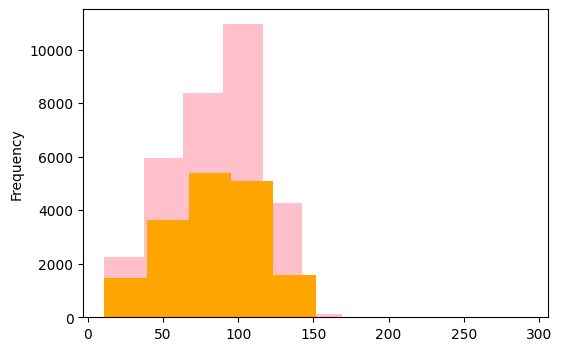

In [ ]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [ ]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean of 'label' grouped by 'len' in the train dataset and create the histogram
mean_label_by_len = train.groupby('len').mean()['label']
ax = mean_label_by_len.plot.hist(color='black', figsize=(6, 4))
ax.set_title('Variation of Length')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')

# Save the histogram as a PNG file
plot_file = 'length_variation_hist.png'
plt.savefig(plot_file)

# Display a message indicating the file was saved
print(f"The histogram of length variation has been saved as {plot_file}.")

# Close the plot
plt.close()


The histogram of length variation has been saved as length_variation_hist.png.


<ipython-input-14-f5e3d7e35ce4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_label_by_len = train.groupby('len').mean()['label']


<ipython-input-15-250f85d53a70>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)


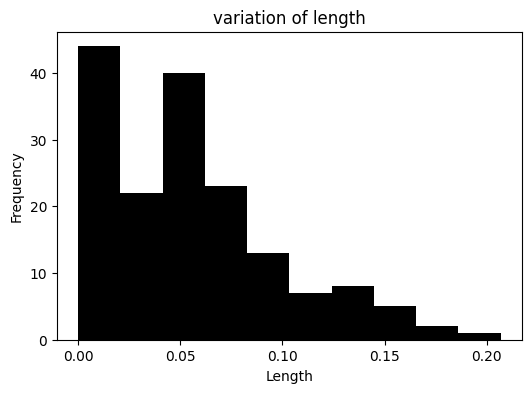

In [ ]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
cv = CountVectorizer(stop_words='english')

# Fit and transform the 'tweet' column of the train dataset
words = cv.fit_transform(train.tweet)

# Calculate the sum of words occurrence
sum_words = words.sum(axis=0)

# Create a list of words and their frequencies
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]

# Sort the words by frequency in descending order
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame of word frequencies
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the top 30 most frequently occurring words
ax = frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')
ax.set_title("Most Frequently Occurring Words - Top 30")
ax.set_xlabel("Word")
ax.set_ylabel("Frequency")

# Save the plot as a PNG file
plot_file = 'top_words_frequency.png'
plt.savefig(plot_file)

# Display a message indicating the file was saved
print(f"The plot of the top 30 most frequently occurring words has been saved as {plot_file}.")

# Close the plot
plt.close()


The plot of the top 30 most frequently occurring words has been saved as top_words_frequency.png.


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

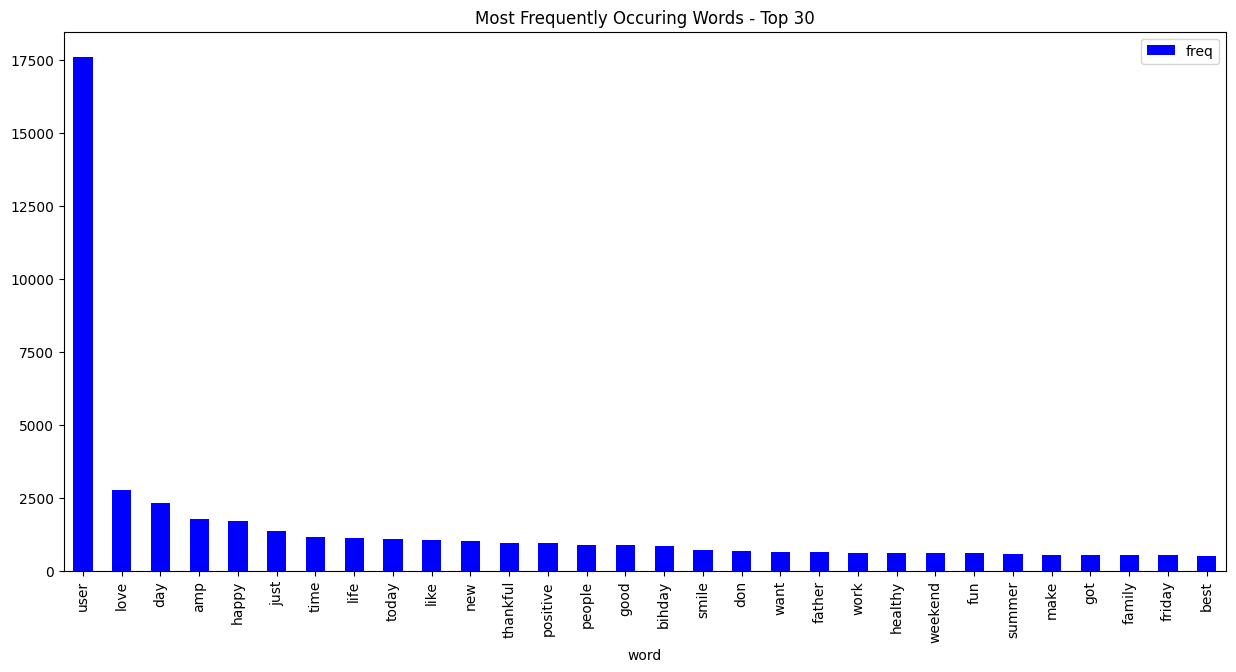

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(words_freq))

# Create a figure and plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize=22)
plt.axis('off')  # Remove axis ticks and labels

# Save the WordCloud as a PNG file
wordcloud_file = 'wordcloud.png'
plt.savefig(wordcloud_file)

# Display a message indicating the file was saved
print(f"The WordCloud has been saved as {wordcloud_file}.")

# Close the plot
plt.close()


The WordCloud has been saved as wordcloud.png.


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

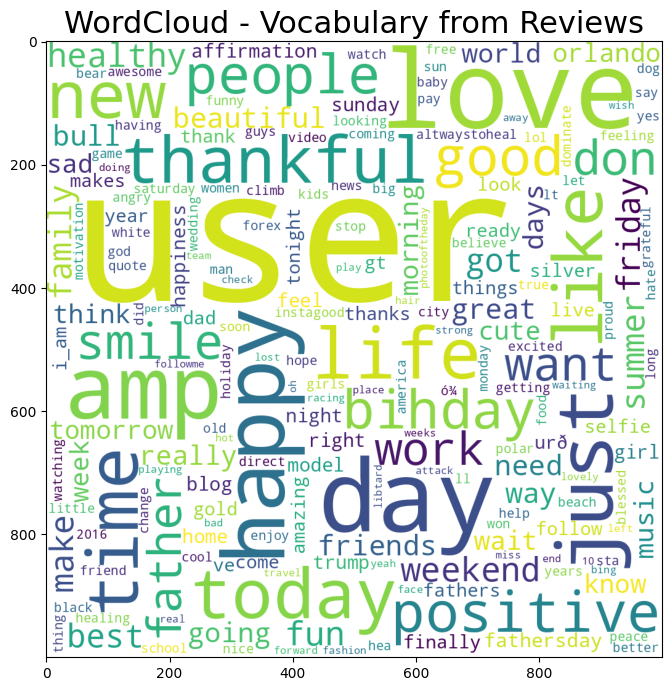

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the normal words into a single string
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)

# Create a figure and plot the WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')

# Save the WordCloud as a PNG file
wordcloud_file = 'neutral_wordcloud.png'
plt.savefig(wordcloud_file)

# Display a message indicating the file was saved
print(f"The WordCloud has been saved as {wordcloud_file}.")

# Close the plot
plt.close()


The WordCloud has been saved as neutral_wordcloud.png.


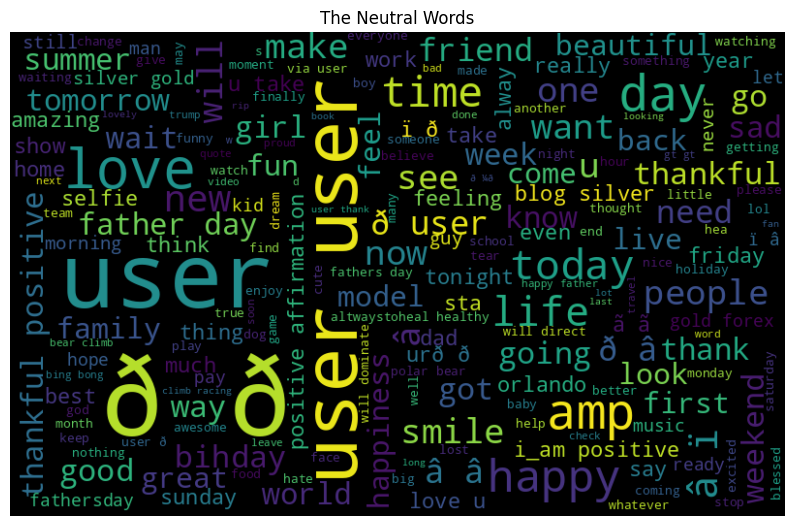

In [ ]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the negative words into a single string
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(background_color='cyan', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)

# Create a figure and plot the WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')

# Save the WordCloud as a PNG file
wordcloud_file = 'negative_wordcloud.png'
plt.savefig(wordcloud_file)

# Display a message indicating the file was saved
print(f"The WordCloud has been saved as {wordcloud_file}.")

# Close the plot
plt.close()


The WordCloud has been saved as negative_wordcloud.png.


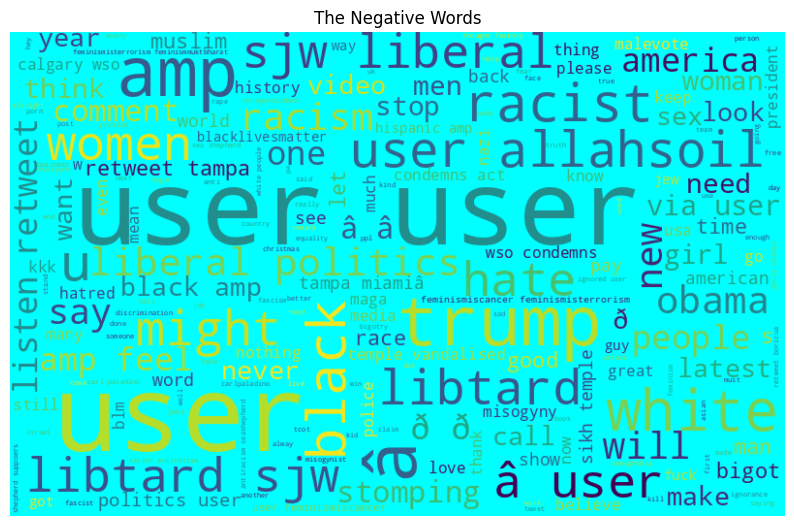

In [ ]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [ ]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a frequency distribution of hashtags
a = nltk.FreqDist(HT_regular)

# Create a DataFrame from the frequency distribution
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select the top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Create the bar plot
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')

# Save the bar plot as a PNG file
barplot_file = 'top_hashtags.png'
plt.savefig(barplot_file)

# Display a message indicating the file was saved
print(f"The bar plot has been saved as {barplot_file}.")

# Close the plot
plt.close()


The bar plot has been saved as top_hashtags.png.


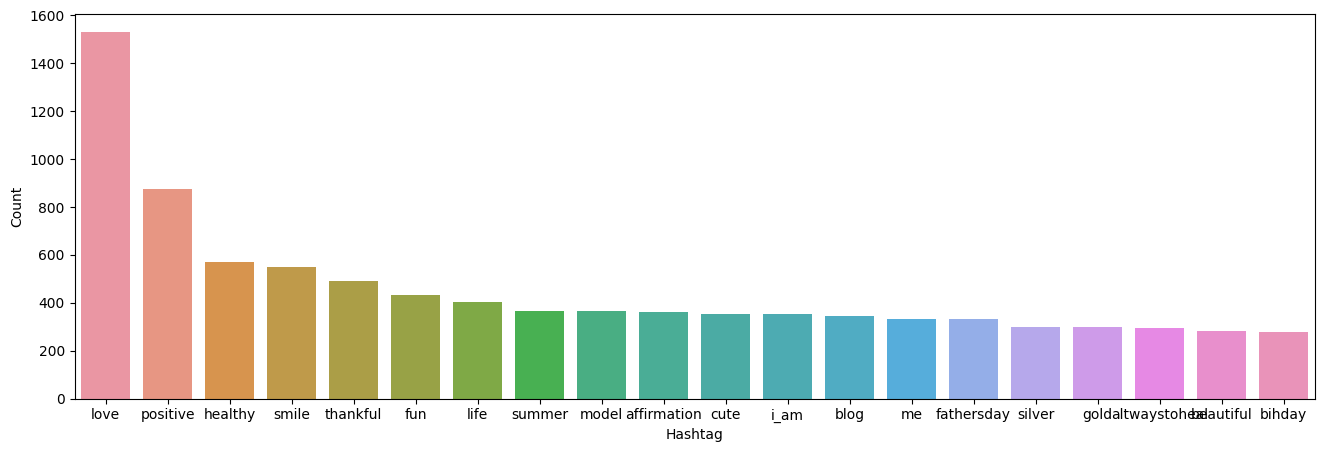

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a frequency distribution of negative hashtags
a = nltk.FreqDist(HT_negative)

# Create a DataFrame from the frequency distribution
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select the top 20 most frequent negative hashtags
d = d.nlargest(columns="Count", n=20)

# Create the bar plot
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')

# Save the bar plot as a PNG file
barplot_file = 'top_negative_hashtags.png'
plt.savefig(barplot_file)

# Display a message indicating the file was saved
print(f"The bar plot has been saved as {barplot_file}.")

# Close the plot
plt.close()


The bar plot has been saved as top_negative_hashtags.png.


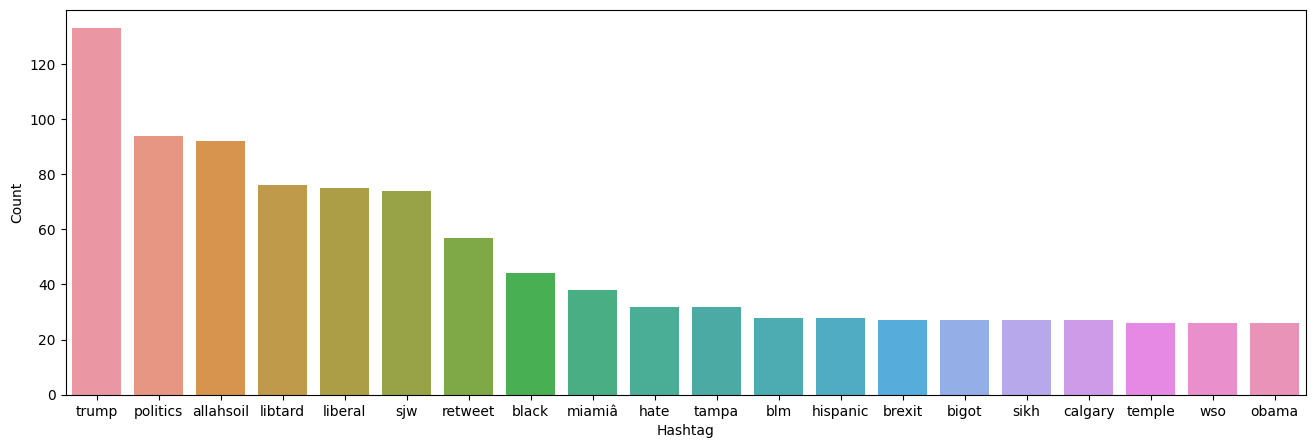

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109793, 8411580)

In [ ]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6668519973754883),
 ('#prosecco', 0.6253984570503235),
 ('#wanderlust', 0.6144275069236755),
 ('#demoday', 0.589506983757019),
 ('shopping!', 0.5872195959091187),
 ('fluffy', 0.5846825838088989),
 ('#boardgames', 0.5845887064933777),
 ('shaped', 0.5845748782157898),
 ('sister!!', 0.5843908786773682),
 ('podium', 0.5842077136039734)]

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7034826278686523),
 ('level.', 0.6998702883720398),
 ('ways.', 0.6917810440063477),
 ('#merica', 0.6832870841026306),
 ('tolerance', 0.6829516291618347),
 ('ownership', 0.6828041076660156),
 ('spots.', 0.6817552447319031),
 ('grp', 0.6784589886665344),
 ('targeted', 0.6782666444778442),
 ('aol', 0.6779494285583496)]

In [ ]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7111291885375977),
 ('"mytraining"', 0.7103952169418335),
 ('training"', 0.692671537399292),
 ('app,', 0.6536456346511841),
 ('"my', 0.6064055562019348),
 ('bees', 0.5815959572792053),
 ('app', 0.5745289921760559),
 ('heroku', 0.5677763223648071),
 ('ios', 0.5596713423728943),
 ('ta', 0.5556008815765381)]

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

[('@', 0.027906138449907303),
 ('#css', 0.02078387327492237),
 ('#wow', 0.020407702773809433),
 ('ð\x9f\x92\x8b', 0.00670767854899168),
 ('â\x9c\x88ï¸\x8f', 0.0040741884149611),
 ('#webdesign', -0.001289616571739316),
 ("you'll", -0.0024660760536789894),
 ('#staup', -0.0027205077931284904),
 ('#bus', -0.004750897642225027),
 ('#babies', -0.005059804301708937)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


Training Accuracy: 0.9990822243544283
Validation Accuracy: 0.9526967838818671
F1 score: 0.6111111111111112
Confusion Matrix:
[[7316  116]
 [ 262  297]]


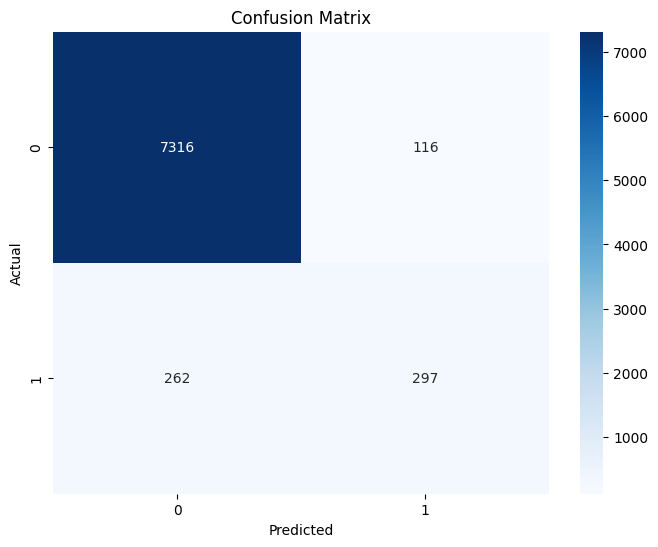

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score:", f1)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Saving the confusion matrix as a PNG file
plt.savefig("confusion_matrix.png", dpi=300)

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9511950944812915
F1 score : 0.6036585365853658
[[7304  128]
 [ 262  297]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9851487213716574
Validation Accuracy: 0.9416843949443123
F1 score: 0.5933682373472949
Confusion Matrix:
[[7185  247]
 [ 219  340]]


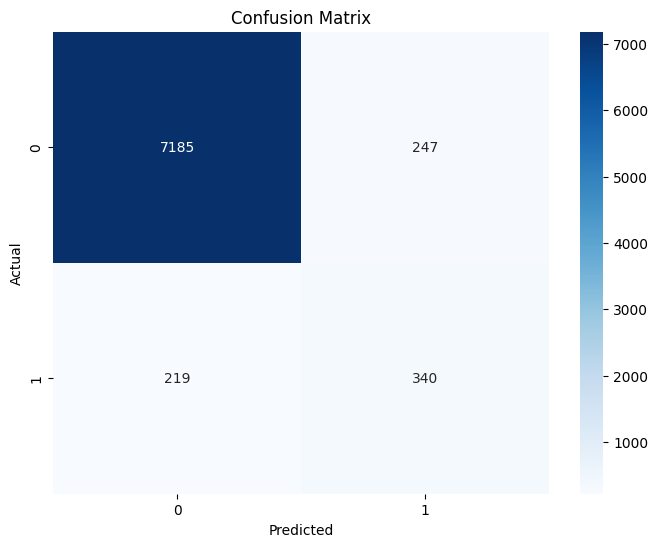

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score:", f1)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Saving the confusion matrix as a PNG file
plt.savefig("confusion_matrix1.png", dpi=300)

plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9991656585040257
Validation Accuracy: 0.9326742585408585
F1 score: 0.5432937181663837
Confusion Matrix:
[[7133  299]
 [ 239  320]]


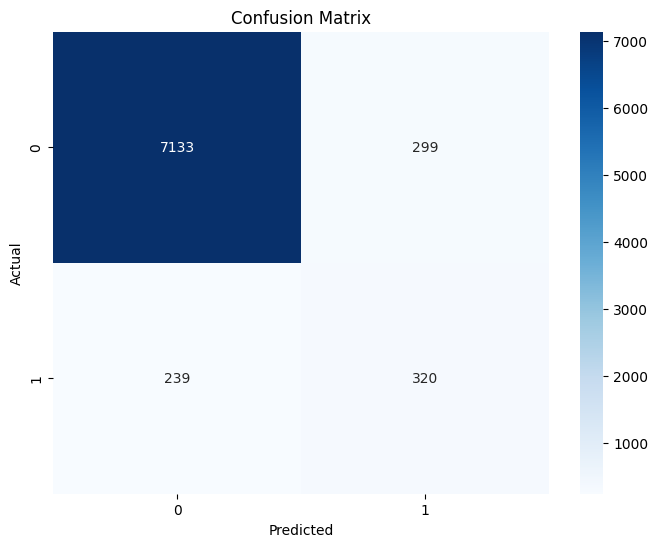

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score:", f1)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Saving the confusion matrix as a PNG file
plt.savefig("confusion_matrix2.png", dpi=300)

plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9302965836566137
f1 score : 0.5291631445477599
[[7121  311]
 [ 246  313]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score:", f1)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Saving the confusion matrix as a PNG file
plt.savefig("confusion_matrix3.png", dpi=300)

plt.show()



In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 score:", f1)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Saving the confusion matrix as a PNG file
plt.savefig("confusion_matrix4.png", dpi=300)

plt.show()


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)